<a href="https://colab.research.google.com/github/amartyasinha918/Real-Time-Face-Mask/blob/main/Face_Mask_Detection_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Folder and change directory
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir('/content/gdrive/My Drive/MaskDetectionRoot/')

Mounted at /content/gdrive


In [ ]:
# import all necessary modules
import cv2
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import train_test_split
import datetime

In [ ]:
# assign variables
data_path = '/content/gdrive/My Drive/MaskDetectionRoot/data/Dataset'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

In [ ]:
print(labels)
print(label_dict)

[0, 1]
{'withMask': 0, 'withoutMask': 1}


In [ ]:
# create necessary variables
img_size = 100
data = []
target = []

# going through each category
for category in categories:
    path = os.path.join(data_path, category)

    # reading image from the image path
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)

        # preprocessing image before appending in try block
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size, img_size))
            # resizing the img into img_size*img_size, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            # appending the category in label dict
            target.append(label_dict[category])

        # handling exception
        except Exception as e:
            print('Exception:', e)

In [ ]:
# reshaping data into numpy array and shaping it
data = np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)
target = np_utils.to_categorical(target)

# saving numpy files of both data and target
# np.save('utils/data', data)
# np.save('utils/target', target)

# printing their shape to cross-check
print(data.shape)
print(target.shape)

(5988, 100, 100, 1)
(5988, 2)


In [ ]:
# loading both numpy files to begin training model
# data = np.load('utils/data.npy')
# target = np.load('utils/target.npy')

start = datetime.datetime.now()
# building model with CNN algo with the help of tf
# 3*3 filter is used, relu activation is used, flattening after creating all layers, softmax is used for better prediction
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(200, (3, 3), padding='same', activation="relu", input_shape=data.shape[1:]),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(100, (3, 3), padding='same', activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(2, activation="softmax")
    ]
)

# compiling model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# splitting data into test and train
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

# creating checkpoint to train model in parts
checkpoint = ModelCheckpoint('models/model-{epoch:03d}.h5', monitor='val_loss', save_best_only=True, mode='auto')
# training model
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)

end = datetime.datetime.now()


Epoch 1/20
135/135 [==============================] - 14s 103ms/step - loss: 0.6367 - accuracy: 0.6057 - val_loss: 0.5107 - val_accuracy: 0.7542
Epoch 2/20
135/135 [==============================] - 14s 101ms/step - loss: 0.3785 - accuracy: 0.8525 - val_loss: 0.2910 - val_accuracy: 0.8822
Epoch 3/20
135/135 [==============================] - 14s 106ms/step - loss: 0.2289 - accuracy: 0.9149 - val_loss: 0.1968 - val_accuracy: 0.9174
Epoch 4/20
135/135 [==============================] - 13s 100ms/step - loss: 0.2129 - accuracy: 0.9209 - val_loss: 0.1818 - val_accuracy: 0.9230
Epoch 5/20
135/135 [==============================] - 14s 104ms/step - loss: 0.1629 - accuracy: 0.9355 - val_loss: 0.1758 - val_accuracy: 0.9369
Epoch 6/20
135/135 [==============================] - 12s 92ms/step - loss: 0.1404 - accuracy: 0.9490 - val_loss: 0.1850 - val_accuracy: 0.9332
Epoch 7/20
135/135 [==============================] - 12s 92ms/step - loss: 0.1439 - accuracy: 0.9457 - val_loss: 0.1811 - val_accu

In [ ]:
print(end-start)

0:04:22.907396


In [ ]:
# saving model
i = 0
while os.path.exists("models/model%s.h5" % i):
    i += 1
model.save('models/model%s.h5' % i)

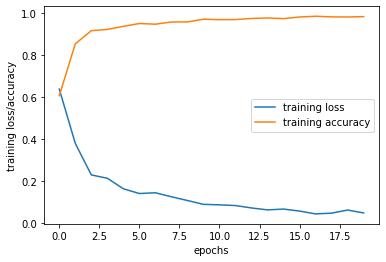

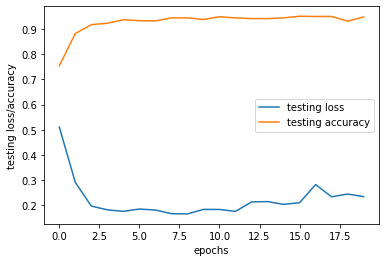

Test
Train


[0.06398245692253113, 0.9849693775177002]

In [ ]:
# plotting graph for training
# plt.figure(dpi=250)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.xlabel('epochs')
plt.ylabel('training loss/accuracy')
plt.legend()
plt.show()

# plotting graph for testing
# plt.figure(dpi=250)
plt.plot(history.history['val_loss'],label='testing loss')
plt.plot(history.history['val_accuracy'], label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('testing loss/accuracy')
plt.legend()
plt.show()

# printing evaluation of test data and test target)
print("Test")
model.evaluate(test_data, test_target, verbose = 0)
print("Train")
model.evaluate(train_data, train_target, verbose = 0)

In [ ]:
print("Test")
model.evaluate(test_data, test_target, verbose = 0)

Test


[0.22697356343269348, 0.9465776085853577]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 200)     2000      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 200)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 100)       180100    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 100)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 62500)             0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 100, 100, 1),
    'dtype': 'float32',
    'name': 'conv2d_4_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 100, 100, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 200,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d_4',
    'padding': 'same',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'MaxPooling2D',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'm

In [ ]:
pred_target_org = model.predict(test_data)

pred_target = pred_target_org

test_target_cp = test_target
pred_target = np.argmax(pred_target, axis = 1)
test_target_cp = np.argmax(test_target, axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(test_target_cp, pred_target)

print(cf_matrix)

[[285  17]
 [ 15 282]]


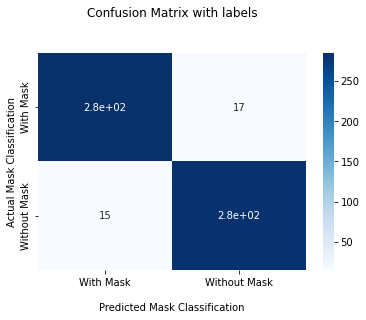

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Mask Classification')
ax.set_ylabel('Actual Mask Classification');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['With Mask','Without Mask'])
ax.yaxis.set_ticklabels(['With Mask','Without Mask'])
## Display the visualization of the Confusion Matrix.
plt.show()